In [30]:
from data.gen_data import build_X, build_Y, build_XY
from data.gen_data_config import gen_data_config
from evaluation import score
import pandas as pd
import numpy as np
from util import plot_roi, categori_reverse
from model import build_model, build_embed_model
from keras.optimizers import SGD, Adam, RMSprop, Adagrad
import keras
import numpy as np
import matplotlib.pyplot as plt
from sklearn import manifold, datasets

In [31]:
def tsne_trans(input):
    tsne = manifold.TSNE(n_components=2, init='pca', random_state=501)
    return tsne.fit_transform(input)

In [32]:
embedding_shape = 32
batch_size = 128
epochs = 300

In [33]:
data_s, data_e = '2001/1/1', '2018/12/31'
target_s, target_e = '2019/1/1', '2019/12/31'
feature_days = 5

In [34]:
sne_dict = {
    'data':{},
    'tar':{}
}
embed_dict = {
    'data':{},
    'tar':{}
}

In [35]:
x, y, data_result = build_XY(data_s, data_e, 
                                 gen_data_config['selected_features'], 
                                 feature_days)
tar_x, tar_y, tar_result = build_XY(target_s, target_e, 
                                 gen_data_config['selected_features'], 
                                 feature_days)

In [36]:
'''for t-SNE'''
feature_day = 1

sne_data, _, _ = build_XY(data_s, data_e, 
                                 ['Open', 'Close'], 
                                 feature_day)
sne_tar, _, _ = build_XY(target_s, target_e, 
                                 ['Open', 'Close'], 
                                 feature_day)
sne_tr_y = []
sne_te_y = []
# data
for r in sne_data:
    if(r[1] > r[0]):
        sne_tr_y.append(0)
    else:
        sne_tr_y.append(1)
# target
for r in sne_tar:
    if(r[1] > r[0]):
        sne_te_y.append(0)
    else:
        sne_te_y.append(1)

In [37]:
print(f'x的shape：{x.shape}')
print(f"一天的k-bar vector長度：{len(gen_data_config['selected_features'])}")

x的shape：(4456, 215)
一天的k-bar vector長度：43


# Task_1

給予t, t-1, t-2的資料作為input預測t-1, t-2

Loss:min(t-1,t-2的RMSE)

In [38]:
task = '1'

In [39]:
'''Data'''
locals()[f'task_{task}_y'] = x[:, len(gen_data_config['selected_features']):]

In [40]:
'''build model'''
model = build_embed_model('dense', 
                           x.shape, 
                           locals()[f'task_{task}_y'].shape, 
                           embedding_shape, 
                          'sigmoid')
sgd = SGD(lr=0.1, momentum=0.1, decay=0.0, nesterov=False)
model.compile(loss='mean_squared_error',
                  optimizer=sgd,
                  metrics=['accuracy'])

In [41]:
'''Fit models and use validation_split=0.1 '''
history = model.fit(x, 
                    locals()[f'task_{task}_y'],
                    batch_size=batch_size,
                    epochs=epochs,
                    verbose=1,
                    shuffle=True,
                    validation_split=0.1)

Train on 4010 samples, validate on 446 samples
Epoch 1/300
4010/4010 [==============================] - 1s 293us/step - loss: 12732.6868 - accuracy: 0.1137 - val_loss: 9575.2846 - val_accuracy: 0.2018
Epoch 2/300
4010/4010 [==============================] - 0s 75us/step - loss: 12722.1426 - accuracy: 0.1803 - val_loss: 9572.2451 - val_accuracy: 0.1973
Epoch 3/300
4010/4010 [==============================] - 0s 77us/step - loss: 12720.4666 - accuracy: 0.1885 - val_loss: 9571.1797 - val_accuracy: 0.1390
Epoch 4/300
4010/4010 [==============================] - 0s 76us/step - loss: 12719.4822 - accuracy: 0.1803 - val_loss: 9570.4409 - val_accuracy: 0.1592
Epoch 5/300
4010/4010 [==============================] - 0s 73us/step - loss: 12719.0103 - accuracy: 0.1848 - val_loss: 9569.3571 - val_accuracy: 0.1390
Epoch 6/300
4010/4010 [==============================] - 0s 71us/step - loss: 12718.5521 - accuracy: 0.1711 - val_loss: 9569.1228 - val_accuracy: 0.1323
Epoch 7/300
4010/4010 [===========

Epoch 54/300
4010/4010 [==============================] - 0s 68us/step - loss: 12715.7012 - accuracy: 0.0544 - val_loss: 9566.9812 - val_accuracy: 0.0202
Epoch 55/300
4010/4010 [==============================] - 0s 68us/step - loss: 12715.6860 - accuracy: 0.0559 - val_loss: 9566.7994 - val_accuracy: 0.0336
Epoch 56/300
4010/4010 [==============================] - 0s 67us/step - loss: 12715.6693 - accuracy: 0.0541 - val_loss: 9566.6731 - val_accuracy: 0.0269
Epoch 57/300
4010/4010 [==============================] - 0s 69us/step - loss: 12715.6686 - accuracy: 0.0546 - val_loss: 9566.6550 - val_accuracy: 0.0291
Epoch 58/300
4010/4010 [==============================] - 0s 67us/step - loss: 12715.6337 - accuracy: 0.0521 - val_loss: 9566.5922 - val_accuracy: 0.0314
Epoch 59/300
4010/4010 [==============================] - 0s 69us/step - loss: 12715.6543 - accuracy: 0.0496 - val_loss: 9566.6505 - val_accuracy: 0.0314
Epoch 60/300
4010/4010 [==============================] - 0s 71us/step - los

4010/4010 [==============================] - 0s 69us/step - loss: 12715.2341 - accuracy: 0.0394 - val_loss: 9566.3506 - val_accuracy: 0.0269
Epoch 108/300
4010/4010 [==============================] - 0s 66us/step - loss: 12715.2088 - accuracy: 0.0384 - val_loss: 9566.2569 - val_accuracy: 0.0404
Epoch 109/300
4010/4010 [==============================] - 0s 67us/step - loss: 12715.2420 - accuracy: 0.0397 - val_loss: 9566.3479 - val_accuracy: 0.0314
Epoch 110/300
4010/4010 [==============================] - 0s 69us/step - loss: 12715.2389 - accuracy: 0.0369 - val_loss: 9566.3107 - val_accuracy: 0.0269
Epoch 111/300
4010/4010 [==============================] - 0s 69us/step - loss: 12715.2060 - accuracy: 0.0399 - val_loss: 9566.3180 - val_accuracy: 0.0314
Epoch 112/300
4010/4010 [==============================] - 0s 69us/step - loss: 12715.1927 - accuracy: 0.0389 - val_loss: 9566.3001 - val_accuracy: 0.0314
Epoch 113/300
4010/4010 [==============================] - 0s 67us/step - loss: 1271

Epoch 160/300
4010/4010 [==============================] - 0s 66us/step - loss: 12715.0876 - accuracy: 0.0344 - val_loss: 9566.2311 - val_accuracy: 0.0247
Epoch 161/300
4010/4010 [==============================] - 0s 67us/step - loss: 12715.0672 - accuracy: 0.0312 - val_loss: 9566.2483 - val_accuracy: 0.0179
Epoch 162/300
4010/4010 [==============================] - 0s 67us/step - loss: 12715.1012 - accuracy: 0.0324 - val_loss: 9566.2267 - val_accuracy: 0.0314
Epoch 163/300
4010/4010 [==============================] - 0s 74us/step - loss: 12715.0513 - accuracy: 0.0337 - val_loss: 9566.2241 - val_accuracy: 0.0224
Epoch 164/300
4010/4010 [==============================] - 0s 66us/step - loss: 12715.0453 - accuracy: 0.0327 - val_loss: 9566.1625 - val_accuracy: 0.0269
Epoch 165/300
4010/4010 [==============================] - 0s 66us/step - loss: 12715.0685 - accuracy: 0.0327 - val_loss: 9566.1449 - val_accuracy: 0.0247
Epoch 166/300
4010/4010 [==============================] - 0s 68us/ste

Epoch 213/300
4010/4010 [==============================] - 0s 67us/step - loss: 12714.9306 - accuracy: 0.0299 - val_loss: 9566.0503 - val_accuracy: 0.0247
Epoch 214/300
4010/4010 [==============================] - 0s 67us/step - loss: 12714.9569 - accuracy: 0.0287 - val_loss: 9566.0963 - val_accuracy: 0.0135
Epoch 215/300
4010/4010 [==============================] - 0s 67us/step - loss: 12714.9138 - accuracy: 0.0284 - val_loss: 9566.0445 - val_accuracy: 0.0179
Epoch 216/300
4010/4010 [==============================] - 0s 71us/step - loss: 12714.9442 - accuracy: 0.0259 - val_loss: 9566.0561 - val_accuracy: 0.0179
Epoch 217/300
4010/4010 [==============================] - 0s 69us/step - loss: 12714.9300 - accuracy: 0.0274 - val_loss: 9566.0241 - val_accuracy: 0.0179
Epoch 218/300
4010/4010 [==============================] - 0s 67us/step - loss: 12714.9386 - accuracy: 0.0277 - val_loss: 9566.0664 - val_accuracy: 0.0179
Epoch 219/300
4010/4010 [==============================] - 0s 67us/ste

Epoch 266/300
4010/4010 [==============================] - 0s 75us/step - loss: 12714.8876 - accuracy: 0.0247 - val_loss: 9565.9935 - val_accuracy: 0.0157
Epoch 267/300
4010/4010 [==============================] - 0s 75us/step - loss: 12714.8973 - accuracy: 0.0234 - val_loss: 9566.0494 - val_accuracy: 0.0135
Epoch 268/300
4010/4010 [==============================] - 0s 78us/step - loss: 12714.8753 - accuracy: 0.0274 - val_loss: 9565.9832 - val_accuracy: 0.0179
Epoch 269/300
4010/4010 [==============================] - 0s 73us/step - loss: 12714.8901 - accuracy: 0.0267 - val_loss: 9566.0072 - val_accuracy: 0.0135
Epoch 270/300
4010/4010 [==============================] - 0s 76us/step - loss: 12714.8846 - accuracy: 0.0242 - val_loss: 9566.0406 - val_accuracy: 0.0202
Epoch 271/300
4010/4010 [==============================] - 0s 78us/step - loss: 12714.8632 - accuracy: 0.0269 - val_loss: 9565.9931 - val_accuracy: 0.0157
Epoch 272/300
4010/4010 [==============================] - 0s 67us/ste

In [42]:
model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_19 (Dense)             (None, 512)               110592    
_________________________________________________________________
activation_19 (Activation)   (None, 512)               0         
_________________________________________________________________
batch_normalization_16 (Batc (None, 512)               2048      
_________________________________________________________________
dropout_7 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_20 (Dense)             (None, 512)               262656    
_________________________________________________________________
activation_20 (Activation)   (None, 512)               0         
_________________________________________________________________
batch_normalization_17 (Batc (None, 512)              

In [43]:
'''get embedding output'''
'''get embedding output'''
get_layer_output = keras.backend.function([model.layers[0].input],
                                  [model.layers[16].output])
embed_dict['data'][task] = get_layer_output([x])[0]
embed_dict['tar'][task] = get_layer_output([tar_x])[0]

In [44]:
'''data t-SNE'''
sne_dict['data'][task]  = tsne_trans(embed_dict['data'][task])
sne_dict['tar'][task] = tsne_trans(embed_dict['tar'][task])

# Task_2a
分類 t+1 是上漲或下跌

In [45]:
task = '2a'

In [46]:
feature_day = 0
task_2a, _, _ = build_XY(data_s, data_e, 
                                 ['Open', 'Close'], 
                             feature_day)

task_2a_y = []
for r in task_2a:
    if(r[1] > r[0]):
        task_2a_y.append(0)
    else:
        task_2a_y.append(1)
task_2a_y = keras.utils.to_categorical(task_2a_y, 2)

In [47]:
'''build model'''
model = build_embed_model('dense', x.shape, task_2a_y.shape, 
                                 embedding_shape, 'softmax')
model.compile(loss='binary_crossentropy',
                  optimizer='Adam',
                  metrics=['accuracy'])

In [48]:
'''Fit models and use validation_split=0.1 '''
history = model.fit(x, 
                    task_2a_y,
                    batch_size=batch_size,
                    epochs=epochs,
                    verbose=1,
                    shuffle=True,
                    validation_split=0.1)

Train on 4010 samples, validate on 446 samples
Epoch 1/300
4010/4010 [==============================] - 1s 329us/step - loss: 0.8173 - accuracy: 0.5040 - val_loss: 0.8088 - val_accuracy: 0.5045
Epoch 2/300
4010/4010 [==============================] - 0s 80us/step - loss: 0.7053 - accuracy: 0.5327 - val_loss: 0.7712 - val_accuracy: 0.5067
Epoch 3/300
4010/4010 [==============================] - 0s 80us/step - loss: 0.6852 - accuracy: 0.5678 - val_loss: 0.7185 - val_accuracy: 0.5112
Epoch 4/300
4010/4010 [==============================] - 0s 81us/step - loss: 0.6798 - accuracy: 0.5671 - val_loss: 0.7154 - val_accuracy: 0.5291
Epoch 5/300
4010/4010 [==============================] - 0s 77us/step - loss: 0.6763 - accuracy: 0.5803 - val_loss: 0.6959 - val_accuracy: 0.5538
Epoch 6/300
4010/4010 [==============================] - 0s 84us/step - loss: 0.6621 - accuracy: 0.5950 - val_loss: 0.6983 - val_accuracy: 0.5740
Epoch 7/300
4010/4010 [==============================] - 0s 78us/step - loss

4010/4010 [==============================] - 0s 79us/step - loss: 0.2667 - accuracy: 0.8900 - val_loss: 1.2752 - val_accuracy: 0.5471
Epoch 57/300
4010/4010 [==============================] - 0s 76us/step - loss: 0.2391 - accuracy: 0.9022 - val_loss: 1.2038 - val_accuracy: 0.5650
Epoch 58/300
4010/4010 [==============================] - 0s 83us/step - loss: 0.2329 - accuracy: 0.9085 - val_loss: 1.3355 - val_accuracy: 0.5583
Epoch 59/300
4010/4010 [==============================] - 0s 75us/step - loss: 0.2313 - accuracy: 0.9100 - val_loss: 1.2767 - val_accuracy: 0.5448
Epoch 60/300
4010/4010 [==============================] - 0s 78us/step - loss: 0.2293 - accuracy: 0.9062 - val_loss: 1.3051 - val_accuracy: 0.5538
Epoch 61/300
4010/4010 [==============================] - 0s 78us/step - loss: 0.2322 - accuracy: 0.9015 - val_loss: 1.3150 - val_accuracy: 0.5493
Epoch 62/300
4010/4010 [==============================] - 0s 77us/step - loss: 0.2134 - accuracy: 0.9204 - val_loss: 1.4523 - val_a

Epoch 112/300
4010/4010 [==============================] - 0s 87us/step - loss: 0.1327 - accuracy: 0.9499 - val_loss: 1.9165 - val_accuracy: 0.5157
Epoch 113/300
4010/4010 [==============================] - 0s 78us/step - loss: 0.1181 - accuracy: 0.9566 - val_loss: 1.8318 - val_accuracy: 0.5471
Epoch 114/300
4010/4010 [==============================] - 0s 81us/step - loss: 0.1239 - accuracy: 0.9506 - val_loss: 1.8027 - val_accuracy: 0.5179
Epoch 115/300
4010/4010 [==============================] - 0s 77us/step - loss: 0.1290 - accuracy: 0.9534 - val_loss: 1.9039 - val_accuracy: 0.5000
Epoch 116/300
4010/4010 [==============================] - 0s 79us/step - loss: 0.1013 - accuracy: 0.9628 - val_loss: 2.0351 - val_accuracy: 0.5090
Epoch 117/300
4010/4010 [==============================] - 0s 81us/step - loss: 0.0884 - accuracy: 0.9666 - val_loss: 1.9348 - val_accuracy: 0.5336
Epoch 118/300
4010/4010 [==============================] - 0s 75us/step - loss: 0.0882 - accuracy: 0.9696 - val_

4010/4010 [==============================] - 0s 81us/step - loss: 0.0594 - accuracy: 0.9776 - val_loss: 2.1173 - val_accuracy: 0.5561
Epoch 168/300
4010/4010 [==============================] - 0s 79us/step - loss: 0.0707 - accuracy: 0.9721 - val_loss: 2.1731 - val_accuracy: 0.5336
Epoch 169/300
4010/4010 [==============================] - 0s 82us/step - loss: 0.0693 - accuracy: 0.9736 - val_loss: 2.1106 - val_accuracy: 0.5538
Epoch 170/300
4010/4010 [==============================] - 0s 77us/step - loss: 0.0694 - accuracy: 0.9756 - val_loss: 2.1340 - val_accuracy: 0.5291
Epoch 171/300
4010/4010 [==============================] - 0s 77us/step - loss: 0.0732 - accuracy: 0.9718 - val_loss: 2.1180 - val_accuracy: 0.5269
Epoch 172/300
4010/4010 [==============================] - 0s 81us/step - loss: 0.0817 - accuracy: 0.9723 - val_loss: 2.1373 - val_accuracy: 0.5314
Epoch 173/300
4010/4010 [==============================] - 0s 81us/step - loss: 0.0891 - accuracy: 0.9623 - val_loss: 2.1332 -

4010/4010 [==============================] - 0s 74us/step - loss: 0.0493 - accuracy: 0.9818 - val_loss: 2.2282 - val_accuracy: 0.5561
Epoch 223/300
4010/4010 [==============================] - 0s 79us/step - loss: 0.0486 - accuracy: 0.9838 - val_loss: 2.3460 - val_accuracy: 0.5247
Epoch 224/300
4010/4010 [==============================] - 0s 79us/step - loss: 0.0431 - accuracy: 0.9863 - val_loss: 2.4966 - val_accuracy: 0.5224
Epoch 225/300
4010/4010 [==============================] - 0s 76us/step - loss: 0.0588 - accuracy: 0.9793 - val_loss: 2.2457 - val_accuracy: 0.5426
Epoch 226/300
4010/4010 [==============================] - 0s 81us/step - loss: 0.0580 - accuracy: 0.9803 - val_loss: 2.3300 - val_accuracy: 0.5426
Epoch 227/300
4010/4010 [==============================] - 0s 77us/step - loss: 0.0519 - accuracy: 0.9813 - val_loss: 2.3040 - val_accuracy: 0.5493
Epoch 228/300
4010/4010 [==============================] - 0s 80us/step - loss: 0.0485 - accuracy: 0.9830 - val_loss: 2.3177 -

4010/4010 [==============================] - 0s 83us/step - loss: 0.0634 - accuracy: 0.9753 - val_loss: 2.3961 - val_accuracy: 0.5448
Epoch 278/300
4010/4010 [==============================] - 0s 79us/step - loss: 0.0537 - accuracy: 0.9810 - val_loss: 2.4391 - val_accuracy: 0.5179
Epoch 279/300
4010/4010 [==============================] - 0s 76us/step - loss: 0.0559 - accuracy: 0.9813 - val_loss: 2.3050 - val_accuracy: 0.5448
Epoch 280/300
4010/4010 [==============================] - 0s 80us/step - loss: 0.0534 - accuracy: 0.9808 - val_loss: 2.1804 - val_accuracy: 0.5583
Epoch 281/300
4010/4010 [==============================] - 0s 78us/step - loss: 0.0553 - accuracy: 0.9800 - val_loss: 2.1691 - val_accuracy: 0.5471
Epoch 282/300
4010/4010 [==============================] - 0s 79us/step - loss: 0.0413 - accuracy: 0.9873 - val_loss: 2.3004 - val_accuracy: 0.5359
Epoch 283/300
4010/4010 [==============================] - 0s 81us/step - loss: 0.0390 - accuracy: 0.9863 - val_loss: 2.3171 -

In [49]:
'''get embedding output'''
get_layer_output = keras.backend.function([model.layers[0].input],
                                  [model.layers[16].output])
embed_dict['data'][task] = get_layer_output([x])[0]
embed_dict['tar'][task] = get_layer_output([tar_x])[0]

In [50]:
'''data t-SNE'''
sne_dict['data'][task]  = tsne_trans(embed_dict['data'][task])
sne_dict['tar'][task] = tsne_trans(embed_dict['tar'][task])

# Task_2b
分類 t 上漲或下跌

In [51]:
task = '2b'

In [52]:
feature_day = 1
task_2b, _, _ = build_XY(data_s, data_e, 
                                 ['Open', 'Close'], 
                             feature_day)

task_2b_y = []
for r in task_2a:
    if(r[1] > r[0]):
        task_2b_y.append(0)
    else:
        task_2b_y.append(1)
task_2b_y = keras.utils.to_categorical(task_2b_y, 2)

In [53]:
'''build model'''
model = build_embed_model('dense', x.shape, task_2b_y.shape, 
                                 embedding_shape, 'softmax')
model.compile(loss='binary_crossentropy',
                  optimizer='Adam',
                  metrics=['accuracy'])

In [54]:
'''Fit models and use validation_split=0.1 '''
history = model.fit(x, 
                    task_2b_y,
                    batch_size=batch_size,
                    epochs=epochs,
                    verbose=1,
                    shuffle=True,
                    validation_split=0.1)

Train on 4010 samples, validate on 446 samples
Epoch 1/300
4010/4010 [==============================] - 1s 354us/step - loss: 0.8202 - accuracy: 0.4963 - val_loss: 1.3540 - val_accuracy: 0.5022
Epoch 2/300
4010/4010 [==============================] - 0s 89us/step - loss: 0.7036 - accuracy: 0.5439 - val_loss: 0.7994 - val_accuracy: 0.4753
Epoch 3/300
4010/4010 [==============================] - 0s 85us/step - loss: 0.6924 - accuracy: 0.5599 - val_loss: 0.8173 - val_accuracy: 0.5067
Epoch 4/300
4010/4010 [==============================] - 0s 97us/step - loss: 0.6787 - accuracy: 0.5723 - val_loss: 0.7347 - val_accuracy: 0.4955
Epoch 5/300
4010/4010 [==============================] - 0s 95us/step - loss: 0.6800 - accuracy: 0.5698 - val_loss: 0.7392 - val_accuracy: 0.4910
Epoch 6/300
4010/4010 [==============================] - 0s 84us/step - loss: 0.6609 - accuracy: 0.5918 - val_loss: 0.7316 - val_accuracy: 0.4955
Epoch 7/300
4010/4010 [==============================] - 0s 91us/step - loss

4010/4010 [==============================] - 0s 83us/step - loss: 0.2698 - accuracy: 0.8888 - val_loss: 1.2694 - val_accuracy: 0.4955
Epoch 57/300
4010/4010 [==============================] - 0s 83us/step - loss: 0.2584 - accuracy: 0.8965 - val_loss: 1.3440 - val_accuracy: 0.4843
Epoch 58/300
4010/4010 [==============================] - 0s 82us/step - loss: 0.2659 - accuracy: 0.8883 - val_loss: 1.3832 - val_accuracy: 0.5179
Epoch 59/300
4010/4010 [==============================] - 0s 83us/step - loss: 0.2666 - accuracy: 0.8865 - val_loss: 1.3573 - val_accuracy: 0.5022
Epoch 60/300
4010/4010 [==============================] - 0s 91us/step - loss: 0.2445 - accuracy: 0.8963 - val_loss: 1.3433 - val_accuracy: 0.4798
Epoch 61/300
4010/4010 [==============================] - 0s 83us/step - loss: 0.2318 - accuracy: 0.9095 - val_loss: 1.3548 - val_accuracy: 0.5247
Epoch 62/300
4010/4010 [==============================] - 0s 81us/step - loss: 0.2268 - accuracy: 0.9035 - val_loss: 1.3669 - val_a

Epoch 112/300
4010/4010 [==============================] - 0s 80us/step - loss: 0.1136 - accuracy: 0.9608 - val_loss: 1.8449 - val_accuracy: 0.5561
Epoch 113/300
4010/4010 [==============================] - 0s 88us/step - loss: 0.0918 - accuracy: 0.9671 - val_loss: 1.8949 - val_accuracy: 0.5202
Epoch 114/300
4010/4010 [==============================] - 0s 83us/step - loss: 0.0896 - accuracy: 0.9676 - val_loss: 1.9228 - val_accuracy: 0.5022
Epoch 115/300
4010/4010 [==============================] - 0s 82us/step - loss: 0.0899 - accuracy: 0.9701 - val_loss: 1.9495 - val_accuracy: 0.5157
Epoch 116/300
4010/4010 [==============================] - 0s 82us/step - loss: 0.1024 - accuracy: 0.9623 - val_loss: 1.8583 - val_accuracy: 0.5179
Epoch 117/300
4010/4010 [==============================] - 0s 81us/step - loss: 0.0995 - accuracy: 0.9643 - val_loss: 1.8400 - val_accuracy: 0.5516
Epoch 118/300
4010/4010 [==============================] - 0s 87us/step - loss: 0.0913 - accuracy: 0.9666 - val_

4010/4010 [==============================] - 0s 82us/step - loss: 0.0735 - accuracy: 0.9731 - val_loss: 2.1908 - val_accuracy: 0.4910
Epoch 168/300
4010/4010 [==============================] - 0s 81us/step - loss: 0.0613 - accuracy: 0.9776 - val_loss: 2.2155 - val_accuracy: 0.5314
Epoch 169/300
4010/4010 [==============================] - 0s 92us/step - loss: 0.0623 - accuracy: 0.9791 - val_loss: 2.2814 - val_accuracy: 0.5314
Epoch 170/300
4010/4010 [==============================] - 0s 87us/step - loss: 0.0852 - accuracy: 0.9658 - val_loss: 2.2807 - val_accuracy: 0.4933
Epoch 171/300
4010/4010 [==============================] - 0s 80us/step - loss: 0.0693 - accuracy: 0.9741 - val_loss: 2.2310 - val_accuracy: 0.5000
Epoch 172/300
4010/4010 [==============================] - 0s 82us/step - loss: 0.0712 - accuracy: 0.9731 - val_loss: 2.2038 - val_accuracy: 0.5045
Epoch 173/300
4010/4010 [==============================] - 0s 82us/step - loss: 0.0591 - accuracy: 0.9773 - val_loss: 2.1936 -

4010/4010 [==============================] - 0s 88us/step - loss: 0.0714 - accuracy: 0.9728 - val_loss: 2.2917 - val_accuracy: 0.5045
Epoch 223/300
4010/4010 [==============================] - 0s 83us/step - loss: 0.0531 - accuracy: 0.9798 - val_loss: 2.2997 - val_accuracy: 0.4955
Epoch 224/300
4010/4010 [==============================] - 0s 92us/step - loss: 0.0619 - accuracy: 0.9743 - val_loss: 2.4665 - val_accuracy: 0.4888
Epoch 225/300
4010/4010 [==============================] - 0s 92us/step - loss: 0.0545 - accuracy: 0.9796 - val_loss: 2.4283 - val_accuracy: 0.4955
Epoch 226/300
4010/4010 [==============================] - 0s 84us/step - loss: 0.0571 - accuracy: 0.9798 - val_loss: 2.3719 - val_accuracy: 0.4978
Epoch 227/300
4010/4010 [==============================] - 0s 89us/step - loss: 0.0460 - accuracy: 0.9818 - val_loss: 2.3570 - val_accuracy: 0.5224
Epoch 228/300
4010/4010 [==============================] - 0s 89us/step - loss: 0.0475 - accuracy: 0.9818 - val_loss: 2.3806 -

4010/4010 [==============================] - 0s 83us/step - loss: 0.0431 - accuracy: 0.9870 - val_loss: 2.3041 - val_accuracy: 0.5179
Epoch 278/300
4010/4010 [==============================] - 0s 81us/step - loss: 0.0331 - accuracy: 0.9893 - val_loss: 2.3473 - val_accuracy: 0.5247
Epoch 279/300
4010/4010 [==============================] - 0s 82us/step - loss: 0.0389 - accuracy: 0.9860 - val_loss: 2.2850 - val_accuracy: 0.5157
Epoch 280/300
4010/4010 [==============================] - 0s 86us/step - loss: 0.0430 - accuracy: 0.9848 - val_loss: 2.3124 - val_accuracy: 0.5381
Epoch 281/300
4010/4010 [==============================] - 0s 82us/step - loss: 0.0525 - accuracy: 0.9805 - val_loss: 2.2918 - val_accuracy: 0.5179
Epoch 282/300
4010/4010 [==============================] - 0s 83us/step - loss: 0.0492 - accuracy: 0.9830 - val_loss: 2.3559 - val_accuracy: 0.5179
Epoch 283/300
4010/4010 [==============================] - 0s 83us/step - loss: 0.0419 - accuracy: 0.9870 - val_loss: 2.3492 -

In [55]:
'''get embedding output'''
get_layer_output = keras.backend.function([model.layers[0].input],
                                  [model.layers[16].output])
embed_dict['data'][task] = get_layer_output([x])[0]
embed_dict['tar'][task] = get_layer_output([tar_x])[0]

In [56]:
'''data t-SNE'''
sne_dict['data'][task]  = tsne_trans(embed_dict['data'][task])
sne_dict['tar'][task] = tsne_trans(embed_dict['tar'][task])

# t-SNE

Text(0.5, 0.98, 't-SNE model:Dense_32')

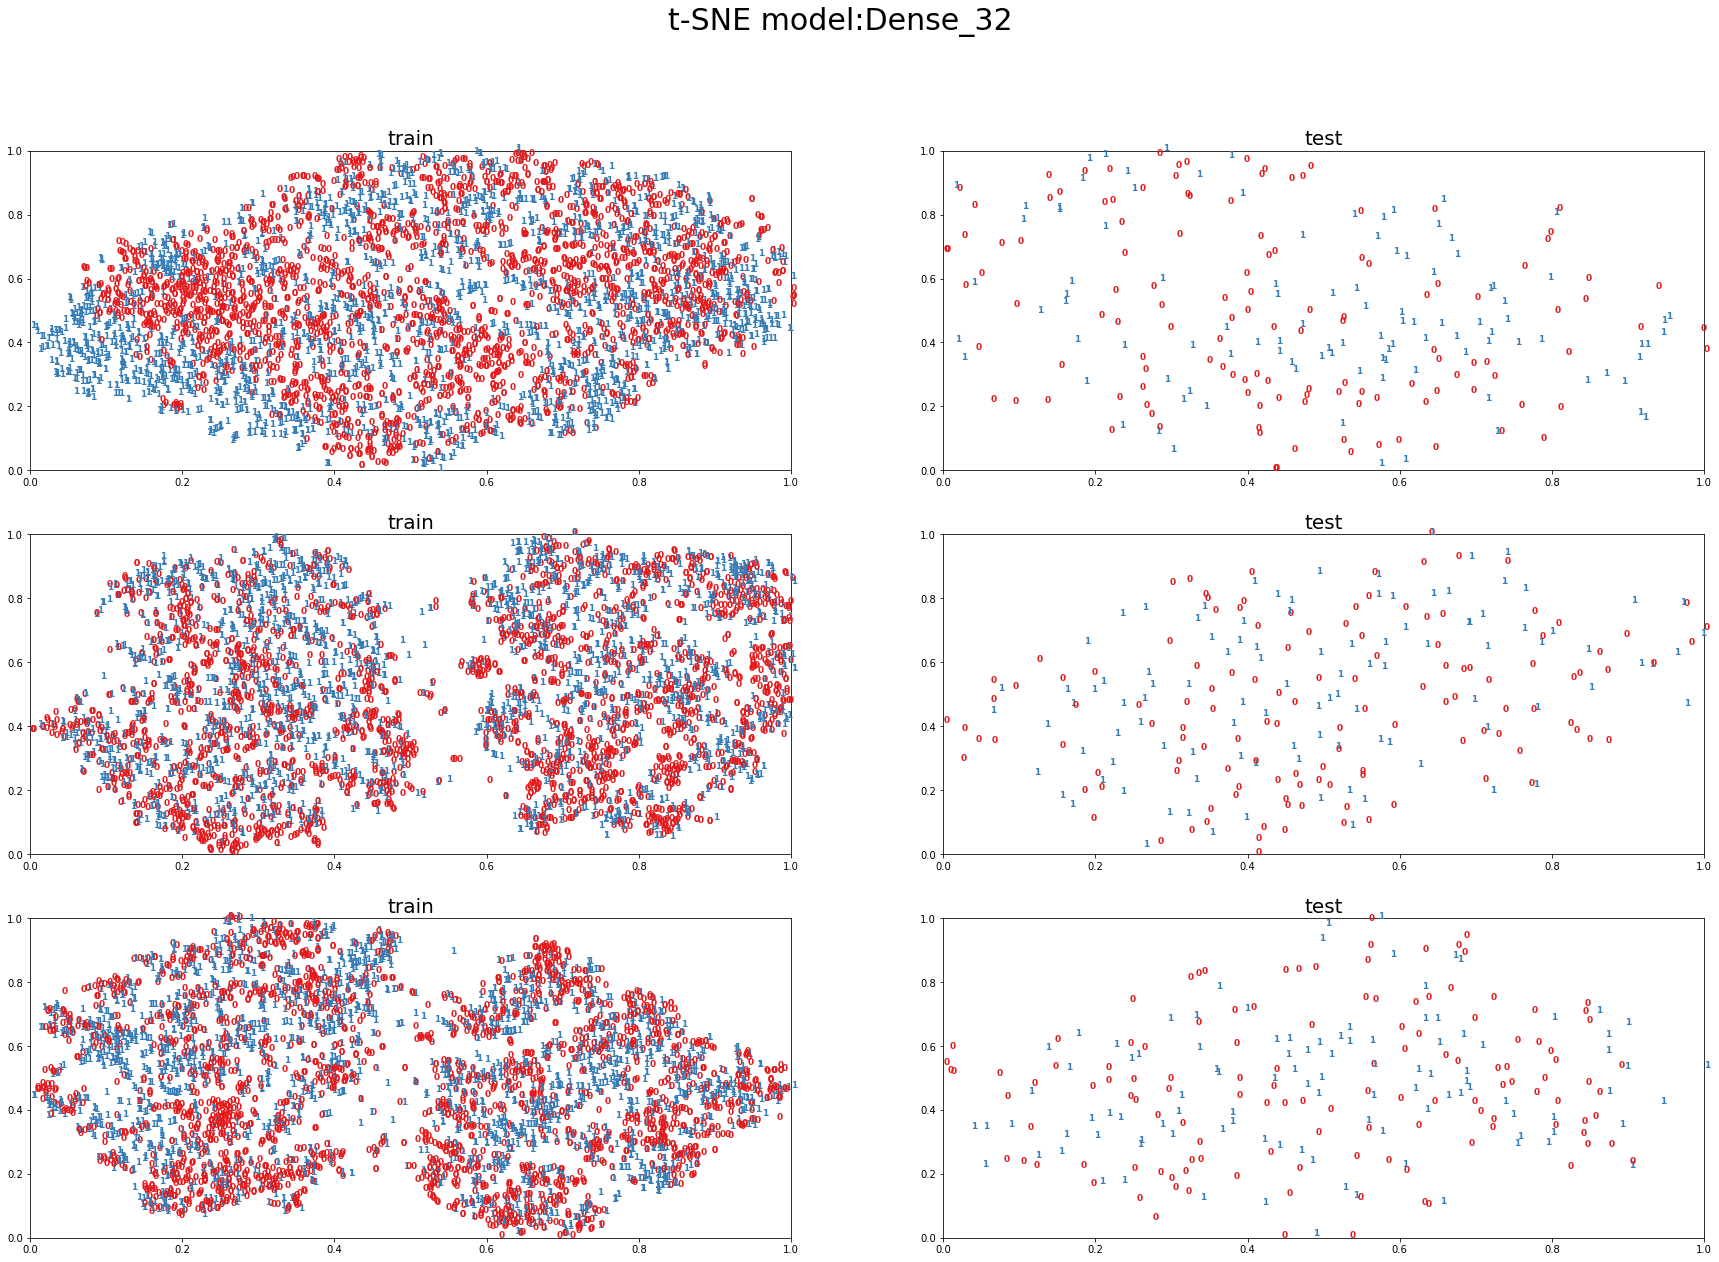

In [57]:
fig = plt.figure(figsize=(30, 20))
ax1 = fig.add_subplot(321)
ax2 = fig.add_subplot(322)
ax3 = fig.add_subplot(323)
ax4 = fig.add_subplot(324)
ax5 = fig.add_subplot(325)
ax6 = fig.add_subplot(326)

for i, t in zip(range(1,4), ['1', '2a', '2b']):
    i = i*2
    left, right = i-1, i
    '''plot left'''
    X_tsne = sne_dict['data'][t]
    x_min, x_max = X_tsne.min(0), X_tsne.max(0)
    X_norm = (X_tsne - x_min) / (x_max - x_min)  # 正規化
    for i in range(X_norm.shape[0]):
        locals()[f'ax{left}'].text(X_norm[i, 0], X_norm[i, 1], str(sne_tr_y[i]), color=plt.cm.Set1(sne_tr_y[i]), 
             fontdict={'weight': 'bold', 'size': 9})
    '''plot right'''
    X_tsne = sne_dict['tar'][t]
    x_min, x_max = X_tsne.min(0), X_tsne.max(0)
    X_norm = (X_tsne - x_min) / (x_max - x_min)  # 正規化
    for i in range(X_norm.shape[0]):
        locals()[f'ax{right}'].text(X_norm[i, 0], X_norm[i, 1], str(sne_te_y[i]), color=plt.cm.Set1(sne_te_y[i]), 
             fontdict={'weight': 'bold', 'size': 9})

    locals()[f'ax{left}'].set_title('train', fontsize=20)
    locals()[f'ax{right}'].set_title('test', fontsize=20)

fig.suptitle(f't-SNE model:Dense_{embedding_shape}', fontsize=30)

# save

In [58]:
from pickle import dump
fig.savefig(f'./fig/tsne_dense_{embedding_shape}_{feature_days}.png')
file = open(f'./embedding_data/dense_{embedding_shape}_{feature_days}', 'wb')
dump(embed_dict, file)